<h1 style="color:#045F01;text-align:center;">DETERMINING HEART DISEASE FACTORS USING BASIC METHODS FROM MACHINE LEARNING</h1>

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT_6-9v45JmiOBYVCKAtzKRTuZXYEDTjN2jH1995VfOxNP3YxJm&usqp=CAU"> </img>

<h2 style="color:#045F01;text-align:center;">File download and description of data.</h2>

The database was originally downloaded from https://www.kaggle.com/ronitf/heart-disease-uci.
It contains 1025 records with the 14 following attributes: <br><br>
1.- Age (age)<br> 
2.- Sex (sex) <br>
3.- Type of ches pain (cp, values: 0,1,2,3) <br>
4.- Blood pressure at rest (trestbps) <br>
5.- Serum cholesterol in in mg/dl (chol) <br>
6.- Fasting Blood Sugar > 120 mg/dl (fbs) <br>
7.- Resting electrocardiographic results (restecg, values: 0,1,2) <br>
8.- Maximum heart rate reached (thalach) <br>
9.- Angina induced by exercise (exang, valores: 0,1) <br>
10.- ST depression induced by exercise relative to rest (oldpeak) <br>
11.- Slope of the ST segment at the peak of the exercise (slope, values: 0,1,2) <br>
12.- Number of main vessels (0-3) stained by flouroscopy <br>
13.- Thal: 0 = normal; 1 = fixed defect; 7 = reversible defect <br>
14.- Heart disease (target, values: 0.1) <br>

The goal is to predict, using any of the other 13 attributes, whether a new patient has heart disease. In this paper, we will use the following scikit-learn classifiers:

1.- Decision tree <br>
2.- Vector support machine <br>
3.- Logistic regression <br>

We will apply each classifier using the 2 most significant attributes that we will obtain with the help of the SelectKBest function. In the end, we use a PCA to reduce the dimensionality of the attributes to 2 and compare the results.

Also, for each classifier, we obtain three performance measures whose definition is presented below: overall accuracy, false positives, and false positives.

<h2 style="color:#045F01;text-align:center;">Preliminary study of the information</h2>

Once the database is downloaded, we can import it as a Pandas dataframe, view its content and its descriptive statistics:

In [35]:
import numpy as np
import pandas as pd

df = pd.read_csv('heart.csv') 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [36]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


We visualize the scatterplots of the numerical variables. No clear trend is observed between the variables, however, we see that low values of the *oldpeak* variable may be associated with a high probability of suffering from heart disease.

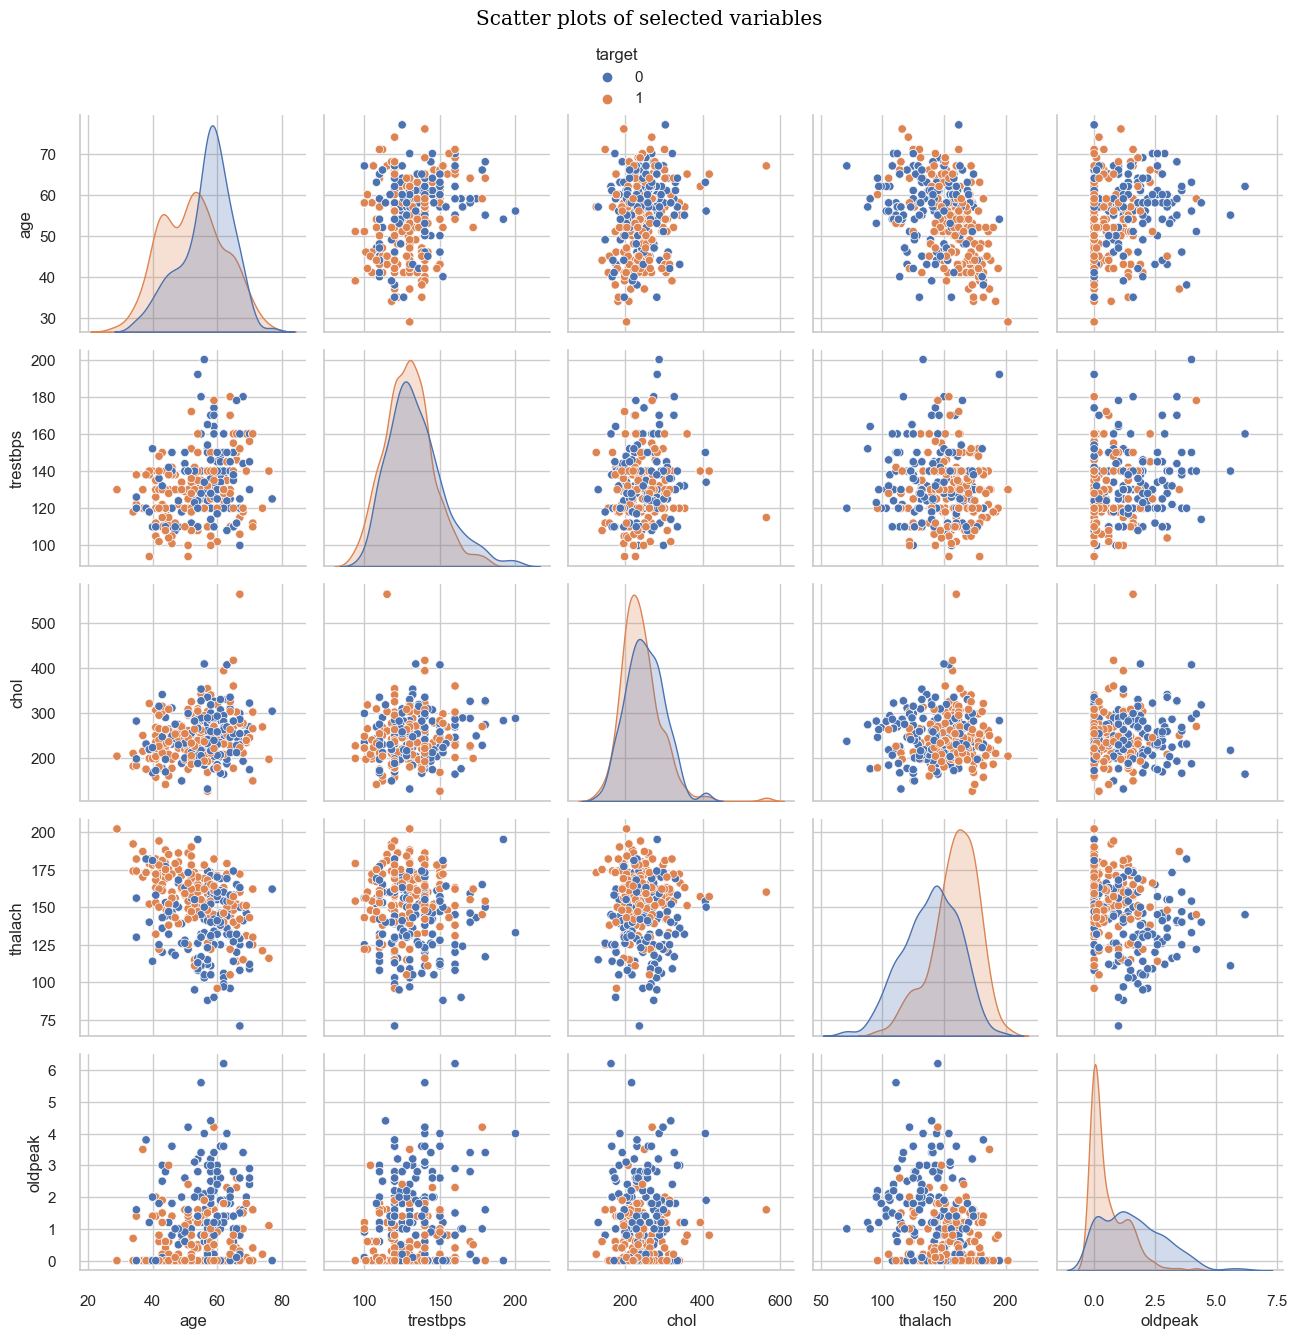

In [37]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
import seaborn as sns

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

sns.set(style = 'whitegrid', context = 'notebook')
cols = ['age', 'trestbps', 'chol', 'thalach','oldpeak','target']
g=sns.pairplot(df[cols],hue='target',vars=['age', 'trestbps', 'chol', 'thalach','oldpeak'])
plt.tight_layout()
g._legend.set_bbox_to_anchor((0.5, 1.01))
plt.suptitle('Scatter plots of selected variables', fontdict=font, y=1.07)
plt.show()

<h2 style="color:#045F01;text-align:center;">Auxiliary Function</h2>

Below we define the function to be used to plot choice regions:

In [38]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings

def versiontuple(v):
    return tuple(map(int, (v.split("."))))

def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)    
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], 
                    y = X[y == cl, 1],
                    alpha = 0.6, 
                    #c = cmap(idx),
                    #edgecolor = 'black',
                    marker = markers[idx], 
                    label = cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    alpha = 1.0,
                    #edgecolor = 'black',
                    linewidths = 1,
                    marker = 'o',
                    s = 55, label = 'test set')


In [39]:
#from distutils.version import LooseVersion as Version
from packaging.version import Version, parse
from sklearn import __version__ as sklearn_version
if Version(sklearn_version) < Version("0.18"):
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

y=df["target"]

<h2 style="color:#045F01;text-align:center;">Performance Measures</h2>

These are the performance measures that we will use for all classifiers:

Overall Accuracy: The algorithm correctly predicts the existence or non-existence of heart disease. <br>
False negatives: The algorithm predicts that there is no heart disease when in fact there is. <br>
False positives: The algorithm predicts that there is heart disease when in fact there is not. <br>

<h2 style="color:#045F01;text-align:center;">Selection of Variables</h2>

For the selection of significant variables, we will rub a $\chi^{2}$ test with the help of scikit-learn's SelectKBest function.

In [40]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2

X_todas = df.drop('target', axis=1)
mejoresVariables = SelectKBest(score_func=chi2, k=10)
fit = mejoresVariables.fit(X_todas,y)
dfPuntajes = pd.DataFrame(fit.scores_)
dfColumnas = pd.DataFrame(X_todas.columns)
AtributosPuntaje = pd.concat([dfColumnas,dfPuntajes],axis=1)
AtributosPuntaje.columns = ['Attribute','Score']
print(AtributosPuntaje.nlargest(10,'Score'))

   Attribute       Score
7    thalach  650.008493
9    oldpeak  253.653461
2         cp  217.823922
11        ca  210.625919
8      exang  130.470927
4       chol  110.723364
0        age   81.425368
3   trestbps   45.974069
10     slope   33.673948
1        sex   24.373650


The result of the algorithm indicates that the two most correlated variables with the "target" variable are "thalach" and "oldpeak". These variables will be used in the implementation of all classifiers.

<h2 style="color:#045F01;text-align:center;">Decision Trees</h2>


<h2 style="color:#045F01;text-align:center;">Define training and test data for the decision tree</h2>

We randomly separate 50% of the data for testing and the other 50% for training.

In [41]:
X = df[["thalach","oldpeak"]]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.5, random_state=0)

<h1 style="color:#045F01;text-align:center;">Implementation and performance of the decision tree</h1>

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

treeX = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
treeX.fit(X_train.values, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

y_pred=treeX.predict(X_combined)
print('--- PERFORMANCE ---')
exacGlobal=accuracy_score(y_combined, y_pred)
falsoPos=(((y_pred==0)&(y_combined!=0)).sum())/len(y_combined)
posFalso=(((y_pred!=0)&(y_combined==0)).sum())/len(y_combined)
print('Overall Accuracy: {}'.format(round(exacGlobal,2)))
print('False Negatives: {}'.format(round(falsoPos,2)))
print('False Positives: {}'.format(round(posFalso,2)))

--- PERFORMANCE ---
Overall Accuracy: 0.73
False Negatives: 0.01
False Positives: 0.26


Performance is calculated from **all** data, not just test data. From these performance measures, it can be concluded that the decision tree, with the variables *thalach* and *oldpeak*, is a method that could be considered effective in predicting the **absence** of heart disease. This can be seen in the following plot of the decision regions:

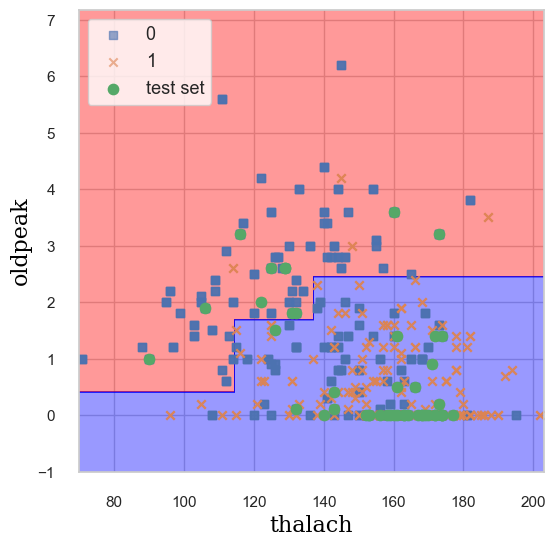

In [43]:
plt.figure(figsize=(6,6)) 
plt.xlabel('thalach',fontdict=font)
plt.ylabel('oldpeak',fontdict=font)
plot_decision_regions(X_combined, y_combined, 
                      classifier=treeX, test_idx=range(105, 150))
plt.legend(loc='upper left',prop={'size': 13})
plt.show()


With Sklearn version 0.21, the decision tree can be displayed, although the lines are not very visible. You can also export a file in .dot format

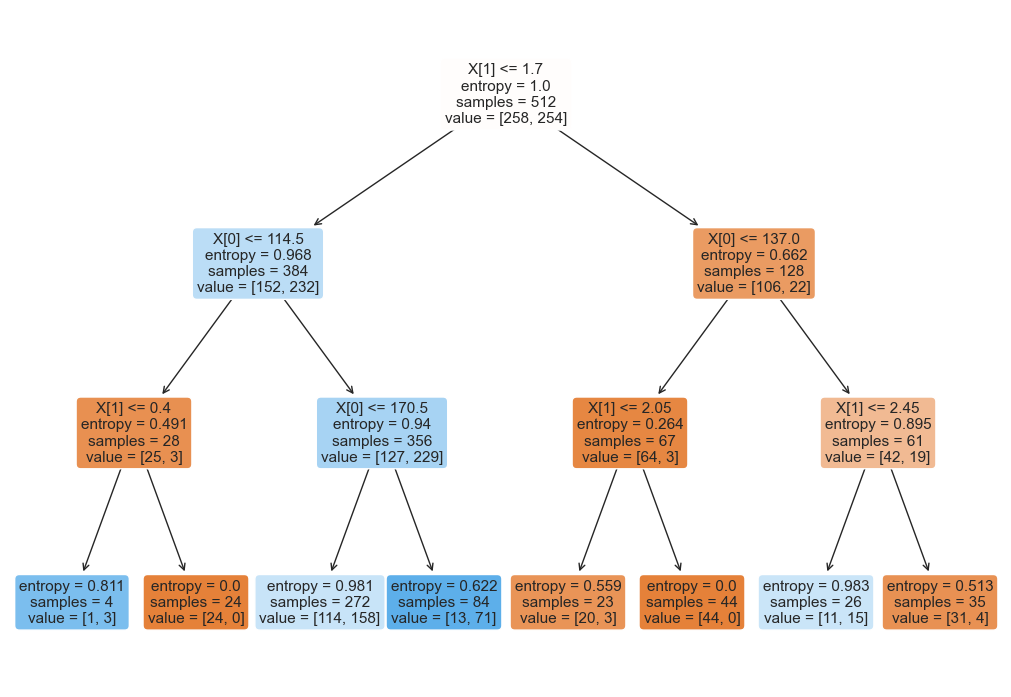

In [44]:

from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from matplotlib.pylab import rcParams
from sklearn import tree

export_graphviz(treeX,out_file=r'decision_tree.dot');

plot_tree(treeX.fit(X_train, y_train),rounded=True,filled=True,fontsize=11);
plt.show()

<h1 style="color:#045F01;text-align:center;">Support Vector Machine</h1>


<h2 style="color:#045F01;text-align:center;">Define training and test data for SVM</h2>

For this second algorithm, we also use only 2 attributes: *thalach* and *oldpeak*. We randomly separate 50% of the data for testing and the other 50% for training.

In [45]:
X=df[["thalach","oldpeak"]]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.5, random_state=0)

<h2 style="color:#045F01;text-align:center;">Implementation and performance of the SVM</h2>

First we scale the training and test data.

In [46]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

Next we implement the algorithm, evaluate its performance, and plot the decision regions:

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel = 'poly', random_state = 0, gamma = 0.1, C = 0.1)
svm.fit(X_train_std, y_train)

X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

y_pred=svm.predict(X_combined)
print('--- PERFORMANCE ---')
exacGlobal=accuracy_score(y_combined, y_pred)
falsoPos=(((y_pred==0)&(y_combined!=0)).sum())/len(y_combined)
posFalso=(((y_pred!=0)&(y_combined==0)).sum())/len(y_combined)
print('Overall Accuracy: {}'.format(round(exacGlobal,2)))
print('False Negatives: {}'.format(round(falsoPos,2)))
print('False Positives: {}'.format(round(posFalso,2)))

--- PERFORMANCE ---
Overall Accuracy: 0.65
False Negatives: 0.01
False Positives: 0.34


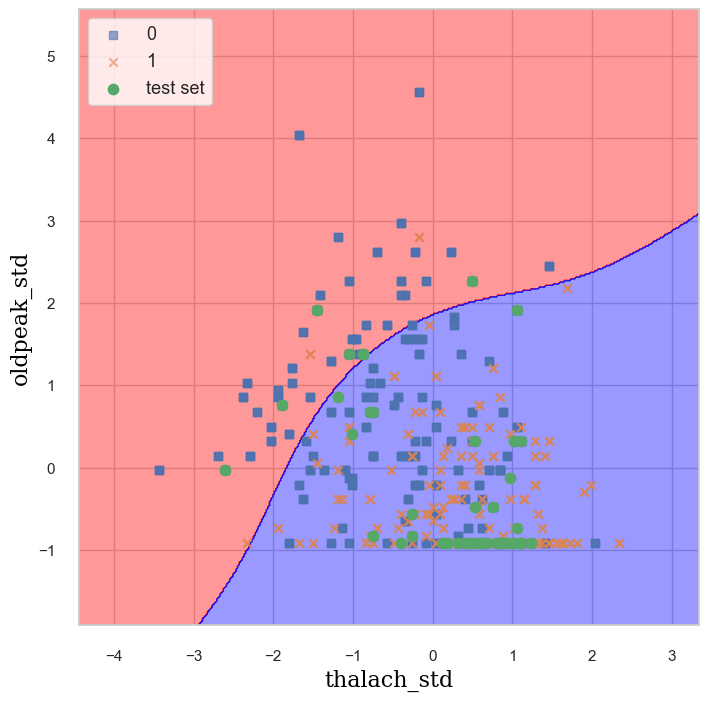

In [48]:
plt.figure(figsize=(8,8)) 
plt.xlabel('thalach_std',fontdict=font)
plt.ylabel('oldpeak_std',fontdict=font)
plot_decision_regions(X_combined, y_combined, 
                      classifier=svm, test_idx=range(105, 150))
plt.legend(loc='upper left',prop={'size': 13})
plt.show()

<h1 style="color:#045F01;text-align:center;">Logistic Regression</h1>


In [49]:
X=df[["thalach","oldpeak"]]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.5, random_state=0)

In [50]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [51]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C = 1000.0, random_state = 0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, random_state=0)

In [52]:
X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

y_pred=lr.predict(X_combined)
print('--- PERFORMANCE ---')
exacGlobal=accuracy_score(y_combined, y_pred)
falsoPos=(((y_pred==0)&(y_combined!=0)).sum())/len(y_combined)
posFalso=(((y_pred!=0)&(y_combined==0)).sum())/len(y_combined)
print('Overall Accuracy: {}'.format(round(exacGlobal,2)))
print('False Negatives: {}'.format(round(falsoPos,2)))
print('False Positives: {}'.format(round(posFalso,2)))

--- PERFORMANCE ---
Overall Accuracy: 0.73
False Negatives: 0.12
False Positives: 0.15


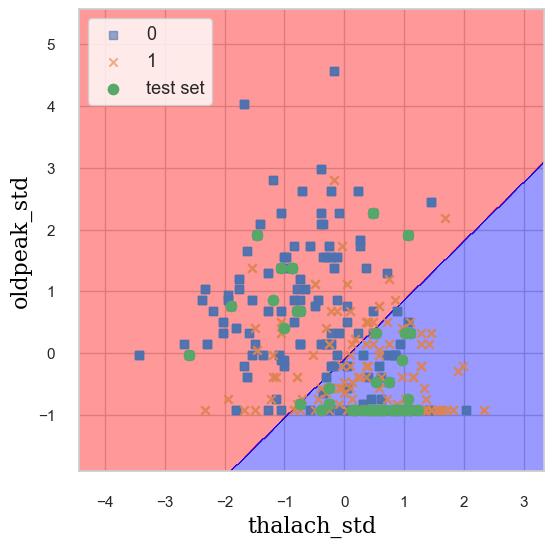

In [54]:
plt.figure(figsize=(6,6)) 
plt.xlabel('thalach_std',fontdict=font)
plt.ylabel('oldpeak_std',fontdict=font)
plot_decision_regions(X_combined, y_combined, 
                      classifier=lr, test_idx=range(105, 150))
plt.legend(loc='upper left',prop={'size': 13})
plt.show()

<h1 style="color:#045F01;text-align:center;">Using a PCA to reduce dimensionality</h1>

In this last section, we experiment with using a PCA to reduce the dimensionality of the data. We then repeat the analysis with a decision tree and compare the results.

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, whiten=True)
pca.fit(X_todas)
pca.explained_variance_ratio_

array([0.74530931, 0.15199174])

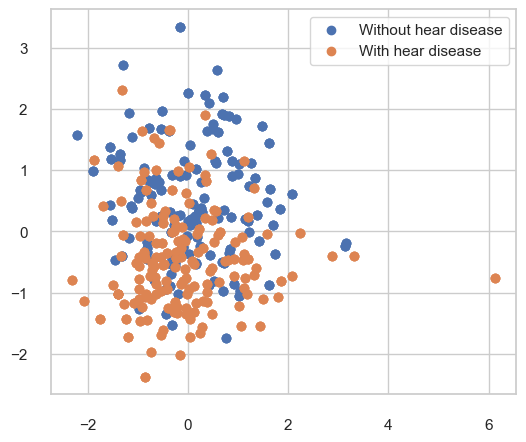

In [56]:
from matplotlib import pyplot as plt

X_pca = pca.transform(X_todas)
plt.figure(figsize = (6, 5))

plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], label='Without hear disease')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], label='With hear disease')
plt.legend()
plt.show()

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size = 0.5, random_state=0)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

y_pred=tree.predict(X_combined)
print('--- PERFORMANCE ---')
exacGlobal=accuracy_score(y_combined, y_pred)
falsoPos=(((y_pred==0)&(y_combined!=0)).sum())/len(y_combined)
posFalso=(((y_pred!=0)&(y_combined==0)).sum())/len(y_combined)
print('Overall Accuracy: {}'.format(round(exacGlobal,2)))
print('False Negatives: {}'.format(round(falsoPos,2)))
print('False Positives: {}'.format(round(posFalso,2)))

--- PERFORMANCE ---
Overall Accuracy: 0.7
False Negatives: 0.11
False Positives: 0.18


The results do not show that there is a significant improvement in the performance of the decision tree.

<h1 style="color:#045F01;text-align:center;">Conclusions</h1>

The variables most correlated with the target variable are "thalach" and "oldpeak". The decision tree and logistic regression methods are the methods that had the best accuracy with 0.73. The decision tree and the regression have the lowest percentage of false positives with 0.01. Also, the results obtained with the use of a PCA for dimensionality reduction do not show a significant improvement compared to the analyzes carried out directly with the "thalach" and "oldpeak" variables.